Our needs for our model include:
- This needs to be a model able to process labels and predict prices based on different attributes.
- Needs to predict fair market values of properties
- Due to the dataset we plan to use for this project + the predictive nature of what I need, we will be using a supervised regressor model for the price baseline calculation.
- This will allow us to create a general price baseline so that we can detect any major anomalies in the dataset for any anomalous pricing using predictive modeling
- This model ideally should be able to catch nonlinear and linear relationships, as these would be the best 

Possible Models/Algorithms:
- Ridge Regression: This is a linear regressor that penalizes large coefficients; this regressor focuses primarily on linear relationships and acts as a simple model for these relationships; however, it fails to capture nonlinear relationships well, and with the varying attributes of homes could be a major disadvantage
- Random Forest Regressor: This is a regression model related to the popular Random Forest algorithm, using various trees to make classifications and regressions based on supervised learning concepts. This is more suited for nonlinear data models and are more suited for complex patterns. However, these are more susceptible to overfitting due to tree depth as well as slowing down the pipeline due to a more slow model to train.
- LightGBM/XGBoost Regressor: This is a popular gradient boosting type regression model that focuses on capturing more subtle changes and more non-distributed variances. This generally has a higher accuracy and builds on top of each tree's predictions. This is a faster model then its counterpart, XGBoost, which does similar regressive analysis, but trades computative cost for accuracy.

To decide between these various regressors, we have also created metric analysis code in order to do metric analysis and comparison to decide the best models to use for our dataset; Before this though, a few main patterns; due to data processing, these are generally non-linear, so therefore that means XGBoost/LightGBM (gradient regressors) or Random Forest Regressors have a much more likely chance of being useful due to their usage for nonlinear operations and predictive modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

df_filled = pd.read_csv("../exploratory_data_analysis/imputed.csv")

target = 'taxvaluedollarcnt'
cols_to_exclude = [target, 'parcelid', 'logerror']
features = [col for col in df_filled.select_dtypes(include=[np.number]).columns 
            if col not in cols_to_exclude]

X = df_filled[features]
y = df_filled[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Average property price: ${y_test.mean():,.0f}")

Average property price: $456,236


In [2]:
# evaluation function
def evaluate_model(y_acc, y_pred, model):
    mae = mean_absolute_error(y_acc, y_pred)
    mse = mean_squared_error(y_acc, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_acc, y_pred)
    mape = np.mean(np.abs((y_acc - y_pred) / y_acc)) * 100
    
    print(f"{model} Performance:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  MAE: ${mae:,.2f}")
    print(f"  MAPE: {mape:.2f}%")
    print(f"  RMSE as % of avg price: {(rmse / y_acc.mean()) * 100:.2f}%")

In [3]:
# here, models for price prediction will be trained using their library counterparts, and from there, dependent on the errors 
# and r^2 score, we would decide which one is best through data analysis and the eval function

# Linear Regressor
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_lr_pred = lr.predict(X_test_scaled)
evaluate_model(y_test, y_lr_pred, "Linear Regression")

Linear Regression Performance:
  R² Score: 0.9978
  RMSE: $25,221.01
  MAE: $2,710.57
  MAPE: 0.92%
  RMSE as % of avg price: 5.53%


In [4]:
# Ridge Regressor
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
y_ridge_pred = ridge.predict(X_test_scaled)
evaluate_model(y_test, y_ridge_pred, "Ridge Regressor")

Ridge Regressor Performance:
  R² Score: 0.9978
  RMSE: $25,222.55
  MAE: $2,715.71
  MAPE: 0.93%
  RMSE as % of avg price: 5.53%


In [5]:
# Random Forest
rand_for = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42, n_jobs=-1)
rand_for.fit(X_train, y_train)
y_rf_pred = rand_for.predict(X_test)
evaluate_model(y_test, y_rf_pred, "Random Forest")

Random Forest Performance:
  R² Score: 0.9942
  RMSE: $41,082.64
  MAE: $4,926.09
  MAPE: 0.65%
  RMSE as % of avg price: 9.00%


In [6]:
# Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)
y_gbr_pred = gbr.predict(X_test)
evaluate_model(y_test, y_gbr_pred, "Gradient Boosting")

Gradient Boosting Performance:
  R² Score: 0.9962
  RMSE: $33,123.84
  MAE: $9,247.36
  MAPE: 2.29%
  RMSE as % of avg price: 7.26%


In [7]:
# LightGBM
lgbm = LGBMRegressor(n_estimators=100,learning_rate=0.1, random_state=42, verbose=-1)
lgbm.fit(X_train, y_train)
y_lgbm_pred = lgbm.predict(X_test)
evaluate_model(y_test, y_lgbm_pred, "LightGBM")

LightGBM Performance:
  R² Score: 0.9041
  RMSE: $166,787.54
  MAE: $17,743.59
  MAPE: 2.95%
  RMSE as % of avg price: 36.56%


In [8]:
# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
evaluate_model(y_test, y_xgb_pred, "XGB Regressor")

XGB Regressor Performance:
  R² Score: 0.8769
  RMSE: $188,944.12
  MAE: $17,437.44
  MAPE: 3.01%
  RMSE as % of avg price: 41.41%


Price Prediction to Anomaly Detection

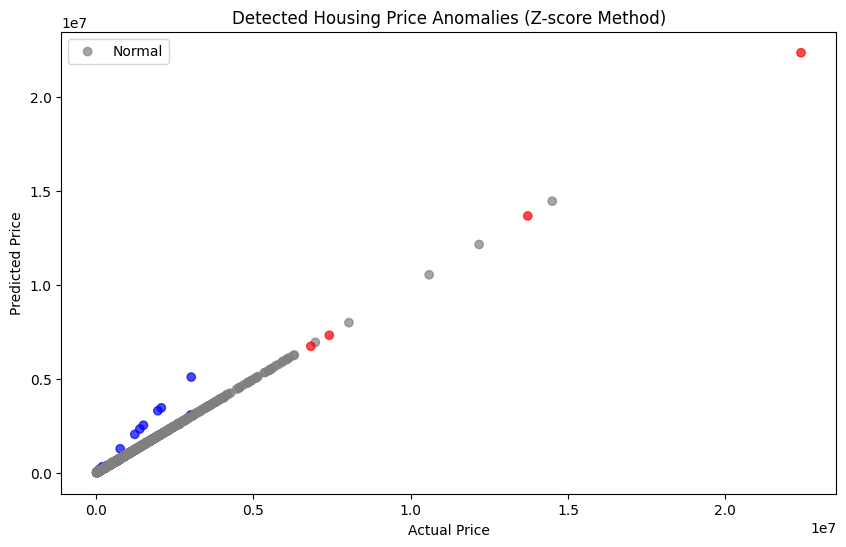

In [9]:
from models import detect_anomalies

anomalies_z = detect_anomalies(y_test, y_lr_pred, method="zscore")

anomalies_z.head(10)

anomalies_if = detect_anomalies(y_test, y_lr_pred, method="isolation_forest", contamination=0.05)
anomalies_if.head(10)

plt.figure(figsize=(10,6))
plt.scatter(anomalies_z["Actual Price"], anomalies_z["Predicted Price"],
            c=np.where(anomalies_z["Anomaly Type"]=="Normal", "gray",
            np.where(anomalies_z["Anomaly Type"]=="Overpriced", "red", "blue")),
            alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Detected Housing Price Anomalies (Z-score Method)")
plt.legend(["Normal", "Overpriced", "Underpriced"])
plt.show()